[*********************100%%**********************]  1 of 1 completed


       Mes  Nike: (Todo el mundo)  Adidas: (Todo el mundo)  \
0  2018-02                     61                       42   
1  2018-03                     67                       46   
2  2018-05                     59                       42   
3  2018-06                     62                       45   
4  2018-08                     70                       43   

   Under Armour: (Todo el mundo)  Puma: (Todo el mundo)      Month       Date  \
0                            0.5                     10 2018-02-01 2018-02-01   
1                            0.5                     12 2018-03-01 2018-03-01   
2                            0.5                     10 2018-05-01 2018-05-01   
3                            0.5                     10 2018-06-01 2018-06-01   
4                            0.5                     10 2018-08-01 2018-08-01   

        Open       High        Low      Close  Adj Close   Volume  
0  67.669998  67.970001  66.699997  67.650002  62.812599  5790500  
1  6

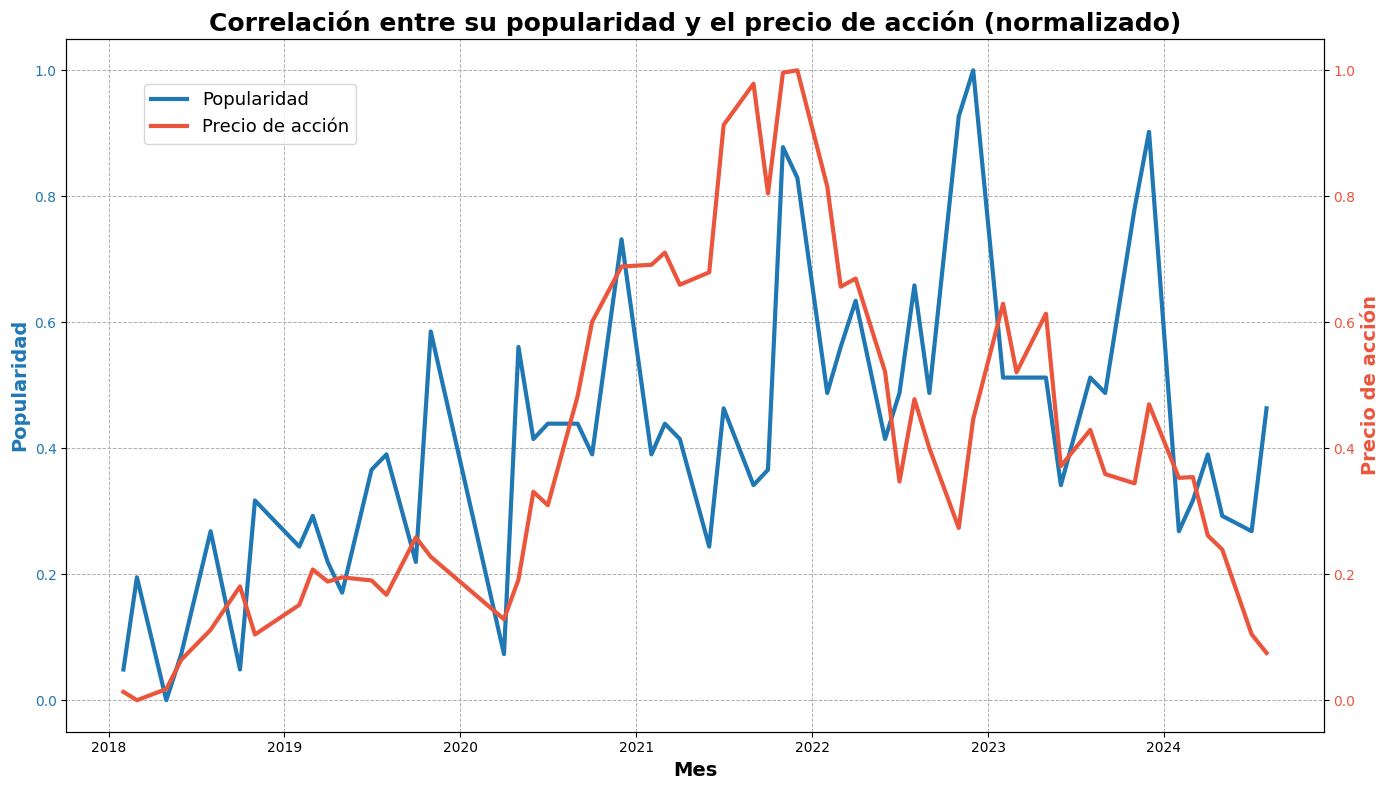

Correlación entre su popularidad y el precio de acción (normalizado): 0.5028993040628471


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

def read_csv_data(file_path):
    df = pd.read_csv(file_path)
    df['Month'] = pd.to_datetime(df['Mes'])
    return df

def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    return stock_data

def merge_datasets(popularity_df, stock_df):
    merged_df = pd.merge(popularity_df, stock_df, left_on='Month', right_on='Date', how='inner')
    return merged_df

def plot_data(merged_df):
    # Normalize the data
    scaler = MinMaxScaler()
    merged_df['Normalized_Popularity'] = scaler.fit_transform(merged_df[['Nike: (Todo el mundo)']])
    merged_df['Normalized_Close'] = scaler.fit_transform(merged_df[['Close']])

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot normalized Nike popularity data with aesthetic blue color
    aesthetic_blue = '#1f77b4'
    ax1.set_xlabel('Mes', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Popularidad', fontsize=14, fontweight='bold', color=aesthetic_blue)
    ax1.plot(merged_df['Month'], merged_df['Normalized_Popularity'], label='Popularidad', color=aesthetic_blue, linewidth=3)
    ax1.tick_params(axis='y', labelcolor=aesthetic_blue)

    # Create a second y-axis for the normalized stock price
    ax2 = ax1.twinx()
    ax2.set_ylabel('Precio de acción', fontsize=14, fontweight='bold', color='#eb553c')
    ax2.plot(merged_df['Month'], merged_df['Normalized_Close'], label='Precio de acción', color='#eb553c', linewidth=3)
    ax2.tick_params(axis='y', labelcolor='#eb553c')

    # Customize the title and labels
    plt.title('Correlación entre su popularidad y el precio de acción (normalizado)', fontsize=18, fontweight='bold', color='black')

    # Rotate the x-axis labels and set their font size
    plt.xticks(rotation=45, fontsize=11)

    # Add a legend with a larger font size
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=13, frameon=True)

    # Add vertical and horizontal grid lines
    ax1.grid(True, linestyle='--', linewidth=0.7, axis='both')

    # Adjust the layout and display the plot
    fig.tight_layout()
    plt.show()

def calculate_correlation(merged_df):
    correlation = merged_df['Normalized_Popularity'].corr(merged_df['Normalized_Close'])
    print(f"Correlación entre su popularidad y el precio de acción (normalizado): {correlation}")

def main():
    popularity_df = read_csv_data('popularity.csv')
    stock_df = download_stock_data('NKE', start_date=popularity_df['Month'].min(), end_date=popularity_df['Month'].max())
    merged_df = merge_datasets(popularity_df, stock_df)
    print(merged_df.head())  # Debugging: Print the first few rows of the merged DataFrame
    plot_data(merged_df)
    calculate_correlation(merged_df)

if __name__ == "__main__":
    main()